# 人工知能課題8 探索課題
## 吹奏楽アンサンブルにおけるプログラム順最適化
南里絢花  

このnotebookで行うこと
- 参加グループデータの読み込み
- 焼きなまし法による最適化
- 改良版焼きなまし法による最適化
- 人手で決めたプログラム順との比較

In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import statistics
from tqdm.notebook import tqdm
from livelossplot import PlotLosses

In [2]:
np.random.seed(42)
random.seed(42)
DATA_PATH = os.path.join('..', 'data', )
EXCEL_PATH = os.path.join(DATA_PATH, '校内アンコンプログラム2018.xlsx')

### 参加グループデータの読み込み

In [3]:
# Excelデータを読み込む
df_original = pd.read_excel(EXCEL_PATH, index_col=0)
df_original

,グループ名,曲目,Person A,Person B,Person C,Person D,Person E,Person F,Person G,Person H,...,Person AK,Person AL,Person AM,Person AN,Person AO,Person AP,Person AQ,Person AR,Person AS,Person AT
プログラム順,,,,,,,,,,,,,,,,,,,,,
1,Group 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Group 2,NaN,o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,NaN,NaN
3,Group 3,NaN,NaN,o,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,o,o,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Group 4,NaN,NaN,NaN,o,o,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Group 5,NaN,NaN,o,NaN,NaN,o,o,o,o,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o
6,Group 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,o,o,o,o,o,o,o,o,NaN,NaN
7,Group 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,o,NaN,NaN,o,o,NaN,NaN,NaN,o,o
8,Group 8,NaN,NaN,o,NaN,NaN,NaN,NaN,o,NaN,...,NaN,NaN,NaN,NaN,NaN,o,NaN,NaN,NaN,NaN
9,Group 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,o


In [4]:
# o->True, 空白->Falseに変える
df_original.iloc[:, 2:] = df_original.iloc[:, 2:].isin(['o'])
df_original

,グループ名,曲目,Person A,Person B,Person C,Person D,Person E,Person F,Person G,Person H,...,Person AK,Person AL,Person AM,Person AN,Person AO,Person AP,Person AQ,Person AR,Person AS,Person AT
プログラム順,,,,,,,,,,,,,,,,,,,,,
1,Group 1,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Group 2,NaN,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,Group 3,NaN,False,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,Group 4,NaN,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Group 5,NaN,False,True,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
6,Group 6,NaN,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
7,Group 7,NaN,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,True,True
8,Group 8,NaN,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,Group 9,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [5]:
def shuffle_dataframe(df):
    indices = df.index.tolist()
    random.shuffle(indices)
    df_shuffled = pd.DataFrame()
    for idx in indices:
        df_shuffled = pd.concat([df_shuffled, pd.DataFrame(data=df.loc[idx, :].values.reshape(1, -1), columns=df.columns)]).reset_index(drop=True)
    return df_shuffled

In [6]:
df = df_original.copy()
df = shuffle_dataframe(df)

### コスト関数の実装

In [7]:
def calc_cost(df):
    cost_sum = np.zeros( len(df.columns) - 2)
    # 人ごとに計算する
    for i in range(2, len(df.columns)):
        n_appear = df.iloc[:, i].sum()
        if n_appear == 1:
            cost_sum[i -2] = 0
        else:
            appear_list = df.iloc[:, i].loc[df.iloc[:, i] == True].index.tolist()
            for j in range(n_appear - 1):
                cost_sum[i - 2] += len(df) / (appear_list[j+1] - appear_list[j])
    return cost_sum

### 探索に使用する関数の実装

In [8]:
# 重複なしで乱数を返す関数
def rand_no_dup(rmin, rmax, num):
    r = set()
    while len(r) < num:
        r.add(np.random.randint(rmin, rmax))
    return r

In [9]:
# ランダムな行をswapする関数
def swap_random(df):
    rand_set = rand_no_dup(0, len(df), 2)
    rand1 = rand_set.pop()
    rand2 = rand_set.pop()
    df_copy = df.copy()
    # swap
    tmp = df_copy.iloc[rand1, :].copy()
    df_copy.iloc[rand1, :] = df_copy.iloc[rand2, :].copy()
    df_copy.iloc[rand2, :] = tmp
    return df_copy

In [10]:
# コストが一番大きい人をswapする関数
def swap_max_person(df, max_index):
    appear_list = df.iloc[:, max_index].loc[df.iloc[:, max_index] == True].index.tolist()
    rand1 = random.choice(appear_list) - 1
    rand2 = np.random.randint(0, len(df) - 1)
    df_copy = df.copy()
    # swap
    tmp = df_copy.iloc[rand1, :].copy()
    df_copy.iloc[rand1, :] = df_copy.iloc[rand2, :].copy()
    df_copy.iloc[rand2, :] = tmp;
    return df_copy

In [11]:
# ランダムに1行取り出し、ランダムな行に挿入する関数
def insert_random(df):
    df_copy = df.copy()
    rand_set = rand_no_dup(0, len(df), 2)
    move_row = rand_set.pop()
    insert_position = rand_set.pop()
    df_inserted = pd.DataFrame()
    if move_row < insert_position:
        df_inserted = pd.concat([df_inserted, df_copy.iloc[:move_row, :]])
        df_inserted = pd.concat([df_inserted, df_copy.iloc[move_row+1:insert_position+1, :]])
        df_inserted = pd.concat([df_inserted, pd.DataFrame(data=df_copy.iloc[move_row, :].values.reshape(1, -1), columns=df_copy.columns)])
        df_inserted = pd.concat([df_inserted, df_copy.iloc[insert_position+1:, :]])
    else:
        df_inserted = pd.concat([df_inserted, df_copy.iloc[:insert_position+1, :]])
        df_inserted = pd.concat([df_inserted, pd.DataFrame(data=df_copy.iloc[move_row, :].values.reshape(1, -1), columns=df_copy.columns)])
        df_inserted = pd.concat([df_inserted, df_copy.iloc[insert_position+1:move_row, :]])
        df_inserted = pd.concat([df_inserted, df_copy.iloc[move_row+1:, :]])
    return df_inserted.reset_index(drop=True)

### 探索方法の実装

In [12]:
# greedy法
def greedy(df):
    df_copy = df.copy()
    rand = np.random.randint(0, len(df_copy) - 1)
    df_new = pd.DataFrame()
    df_new = pd.concat([df_new, pd.DataFrame(data=df_copy.iloc[rand, :].values.reshape(1, -1), columns=df_copy.columns)]).reset_index(drop=True)
    df_copy = df_copy.drop(df_copy.index[rand])
    for i in range(len(df) - 1):
        min_cost = np.inf
        min_index = 0
        for j in range(len(df) - 1 - i):
            cost = calc_cost(pd.concat([df_new, pd.DataFrame(data=df_copy.iloc[j, :].values.reshape(1, -1), columns=df_copy.columns)], axis=0).reset_index(drop=True)).sum()
            if min_cost > cost:
                min_cost = cost
                min_index = j
            elif min_cost == cost and df_copy.iloc[j, 2:].sum() > df_copy.iloc[min_index, 2:].sum():
                min_cost = cost
                min_index = j
        
        df_new = pd.concat([df_new, pd.DataFrame(data=df_copy.iloc[min_index, :].values.reshape(1, -1), columns=df_copy.columns)], axis=0).reset_index(drop=True)
        df_copy = df_copy.drop(df_copy.index[min_index])
    return df_new

In [13]:
# 局所探索法(即時移動戦略)
def local_search_immediate(df_0, display=False):
    df_current = df_0.copy()
    df_swapped = df_0.copy()
    if display:
        liveloss = PlotLosses()
    while True:
        logs = {}
        current_cost = calc_cost(df_current).sum()
        best_flag = 1
        for i in range(len(df)):
            for j in range(i+1, len(df)):
                # swap i , j
                df_swapped = df_current.copy()
                df_swapped.iloc[i, :] = df_current.iloc[j, :]
                df_swapped.iloc[j, :] = df_current.iloc[i, :]
                swapped_cost = calc_cost(df_swapped).sum()
                if swapped_cost - current_cost < 0:
                    df_current = df_swapped
                    best_flag = 0
                    break_flag = 1
            if break_flag == 1:
                break
        if best_flag == 1:
            break
        if display:
            logs['cost'] = current_cost
            liveloss.update(logs)
            liveloss.send()
    return df_current

In [14]:
# 局所探索法(最良移動戦略)
def local_search_best(df_0, display=False):
    df_current = df_0.copy()
    df_best = df_0.copy()
    if display:
        liveloss = PlotLosses()
    while True:
        current_cost = calc_cost(df_current).sum()
        swapped_min_cost = current_cost
        logs = {}
        for i in range(len(df)):
            for j in range(i+1, len(df)):
                # swap i , j
                df_swapped = df_current.copy()
                df_swapped.iloc[i, :] = df_current.iloc[j, :]
                df_swapped.iloc[j, :] = df_current.iloc[i, :]
                swapped_cost = calc_cost(df_swapped).sum()
                if swapped_min_cost > swapped_cost:
                    swapped_min_cost = swapped_cost
                    df_best = df_swapped
        if swapped_min_cost < current_cost:
                df_current = df_best
        else:
            break
        if display:
            logs['cost'] = current_cost
            liveloss.update(logs)
            liveloss.send()
    return df_current

In [15]:
# 焼きなまし法(交換近傍)
def annealing_normal(df_0, n_iter = 10000, t_0 = 100, c = 0.99, display=False):
    df_current = df_0.copy()  # df_current, df_bestを初期解で初期化
    df_best = df_0.copy()
    best_cost = calc_cost(df_0).sum()
    t = t_0  # 温度を初期化
    if display:
        liveloss = PlotLosses()

    # for i in tqdm(range(10000)):
    for i in range(n_iter):
        logs = {}
        current_cost = calc_cost(df_current).sum()
        df_swapped = swap_random(df_current)
        swapped_cost = calc_cost(df_swapped).sum()
        d = swapped_cost - current_cost 
        if d <= 0:
            df_current = df_swapped  # 改善解ならば常に移動する
            current_cost = swapped_cost
            if swapped_cost < best_cost:
                df_best = df_swapped
                best_cost = swapped_cost
        elif np.random.rand() <= np.exp(-d / t):  # 0以上1以下のランダムな実数を返す関数
            df_current = df_swapped  # 改悪解であっても、温度と改悪幅に応じた確率で移動する
            current_cost = swapped_cost
        t = c * t  # 冷却する
        if display:
            logs['cost'] = current_cost
            liveloss.update(logs)
            liveloss.send()

    return df_best

In [16]:
# 焼きなまし法(コスト最大の人の出演を交換)
def annealing_max_swap(df_0, n_iter = 10000, t_0 = 100, c = 0.99, display=False):
    df_current = df_0.copy()  # df_current, df_bestを初期解で初期化
    df_best = df_0.copy()
    best_cost = calc_cost(df_0).sum()
    t = t_0  # 温度を初期化
    if display:
        liveloss = PlotLosses()

    for i in range(n_iter):
        logs = {}
        current_cost_array = calc_cost(df_current)
        current_cost = current_cost_array.sum()
        current_max_person = np.argmax(current_cost_array) + 2
        # df_swapped = swap_random(df_current)
        df_swapped = swap_max_person(df_current, current_max_person)
        swapped_cost_array = calc_cost(df_swapped)
        swapped_cost = swapped_cost_array.sum()
        d = swapped_cost - current_cost 
        if d <= 0:
            df_current = df_swapped  # 改善解ならば常に移動する
            current_cost = swapped_cost
            if swapped_cost < best_cost:
                df_best = df_swapped
                best_cost = swapped_cost
        elif np.random.rand() <= np.exp(-d / t):  # 0以上1以下のランダムな実数を返す関数
            df_current = df_swapped  # 改悪解であっても、温度と改悪幅に応じた確率で移動する
            current_cost = swapped_cost
        t = c * t  # 冷却する
        if display:
            logs['cost'] = current_cost
            liveloss.update(logs)
            liveloss.send()

    return df_best

In [17]:
# 焼きなまし法(挿入近傍)
def annealing_normal_insert(df_0, n_iter = 10000, t_0 = 100, c = 0.99, display=False):
    df_current = df_0.copy()  # df_current, df_bestを初期解で初期化
    df_best = df_0.copy()
    best_cost = calc_cost(df_0).sum()
    t = t_0  # 温度を初期化
    if display:
        liveloss = PlotLosses()

    # for i in tqdm(range(10000)):
    for i in range(n_iter):
        logs = {}
        current_cost = calc_cost(df_current).sum()
        # df_inserted = swap_random(df_current)
        df_inserted = insert_random(df_current)
        inserted_cost = calc_cost(df_inserted).sum()
        d = inserted_cost - current_cost 
        if d <= 0:
            df_current = df_inserted  # 改善解ならば常に移動する
            current_cost = inserted_cost
            if inserted_cost < best_cost:
                df_best = df_inserted
                best_cost = inserted_cost
        elif np.random.rand() <= np.exp(-d / t):  # 0以上1以下のランダムな実数を返す関数
            df_current = df_inserted  # 改悪解であっても、温度と改悪幅に応じた確率で移動する
            current_cost = inserted_cost
        t = c * t  # 冷却する
        if display:
            logs['cost'] = current_cost
            liveloss.update(logs)
            liveloss.send()

    return df_best

### 探索の実行

In [18]:
# ５回ずつ実行して平均をとる
# 処理が重いので実行する場合のみexec_flagをTrueにしてください
exec_flag = True
cost_greedy = []
cost_local_search_imm = []
cost_local_search_best = []
cost_annealing_normal = []
cost_annealing_max = []
cost_annealing_normal_insert = []
cost_local_swap_and_annealing = []
cost_local_insert_and_annealing = []
time_greedy = []
time_local_search_imm = []
time_local_search_best = []
time_annealing_normal = []
time_annealing_max = []
time_annealing_normal_insert = []
time_local_swap_and_annealing = []
time_local_insert_and_annealing = []

if exec_flag:
    for i in range(5):
        df = shuffle_dataframe(df_original)
        # コスト
        start1 = time.time()
        cost_greedy.append(calc_cost(greedy(df)).sum())
        start2 = time.time()
        cost_local_search_imm.append(calc_cost(local_search_immediate(df)).sum())
        start3 = time.time()
        cost_local_search_best.append(calc_cost(local_search_best(df)).sum())
        start4 = time.time()
        cost_annealing_normal.append(calc_cost(annealing_normal(df)).sum())
        start5 = time.time()
        cost_annealing_max.append(calc_cost(annealing_max_swap(df)).sum())
        start6 = time.time()
        cost_annealing_normal_insert.append(calc_cost(annealing_normal_insert(df)).sum())
        start7 = time.time()
        cost_local_swap_and_annealing.append(calc_cost(local_search_best(annealing_normal(df))).sum())
        start8 = time.time()
        cost_local_insert_and_annealing.append(calc_cost(local_search_best(annealing_normal_insert(df))).sum())
        end = time.time()
        # 時間
        time_greedy.append(start2-start1)
        time_local_search_imm.append(start3-start2)
        time_local_search_best.append(start4-start3)
        time_annealing_normal.append(start5-start4)
        time_annealing_max.append(start6-start5)
        time_annealing_normal_insert.append(start7-start6)
        time_local_swap_and_annealing.append(start8-start7)
        time_local_insert_and_annealing.append(end-start8)

    print("グリーディ法                                                         ：", statistics.mean(cost_greedy), '時間:', statistics.mean(time_greedy), flush=True)
    print("局所探索法(即時移動戦略)                                 ：", statistics.mean(cost_local_search_imm), '時間:', statistics.mean(time_local_search_imm), flush=True)
    print("局所探索法(最良移動戦略)                                 ：", statistics.mean(cost_local_search_best), '時間:', statistics.mean(time_local_search_best), flush=True)
    print("焼きなまし法(swap)                                            ：", statistics.mean(cost_annealing_normal), '時間:', statistics.mean(time_annealing_normal), flush=True)
    print("焼きなまし法(コスト最大の人の出演を交換)         ：", statistics.mean(cost_annealing_max), '時間:', statistics.mean(time_annealing_max), flush=True)
    print("焼きなまし法(insert)                                           ：", statistics.mean(cost_annealing_normal_insert), '時間:', statistics.mean(time_annealing_normal_insert), flush=True)
    print("焼きなまし法(swap)+局所探索法                        ：", statistics.mean(cost_local_swap_and_annealing), '時間:', statistics.mean(time_local_swap_and_annealing), flush=True)
    print("焼きなまし法(insert)+局所探索法                       ：", statistics.mean(cost_local_insert_and_annealing), '時間:', statistics.mean(time_local_insert_and_annealing), flush=True)
    print("実際に人手で作成したプログラム                          :", calc_cost(df_original).sum())

グリーディ法                                                         ： 462.74181269710675 時間: 1.6167974948883057
局所探索法(即時移動戦略)                                 ： 533.0898930378187 時間: 1.5390519142150878
局所探索法(最良移動戦略)                                 ： 372.4205218302136 時間: 43.96460337638855
焼きなまし法(swap)                                            ： 383.69653572344106 時間: 169.11714220046997
焼きなまし法(コスト最大の人の出演を交換)         ： 410.77752794161466 時間: 169.77482743263243
焼きなまし法(insert)                                           ： 386.203727541808 時間: 175.43114252090453
焼きなまし法(swap)+局所探索法                        ： 380.5030951298444 時間: 171.49825506210328
焼きなまし法(insert)+局所探索法                       ： 366.7729654650102 時間: 184.37585740089418
実際に人手で作成したプログラム                          : 688.5797300738477


### 探索過程のコストを可視化

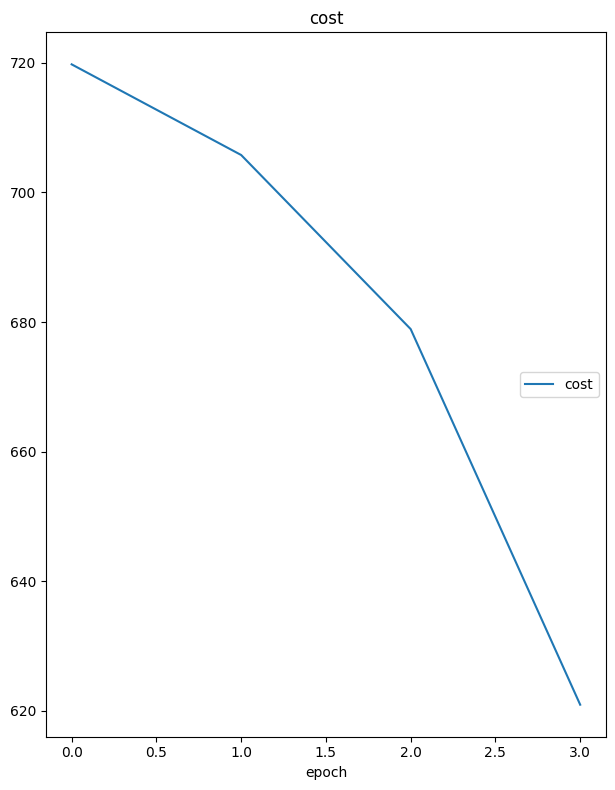

cost
	cost             	 (min:  620.925, max:  719.773, cur:  620.925)


In [19]:
df_best_local_imm = local_search_immediate(df, display=True)

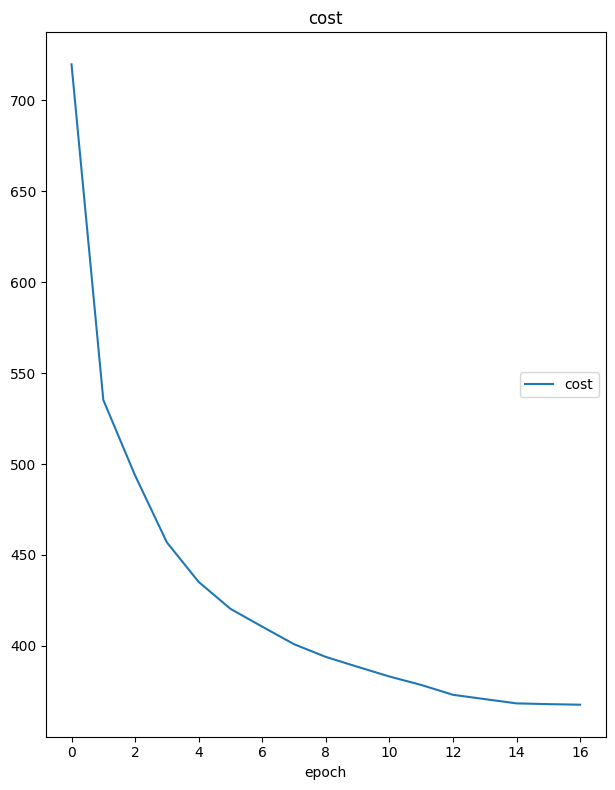

cost
	cost             	 (min:  367.661, max:  719.773, cur:  367.661)


In [20]:
df_best_local_best = local_search_best(df, display=True)

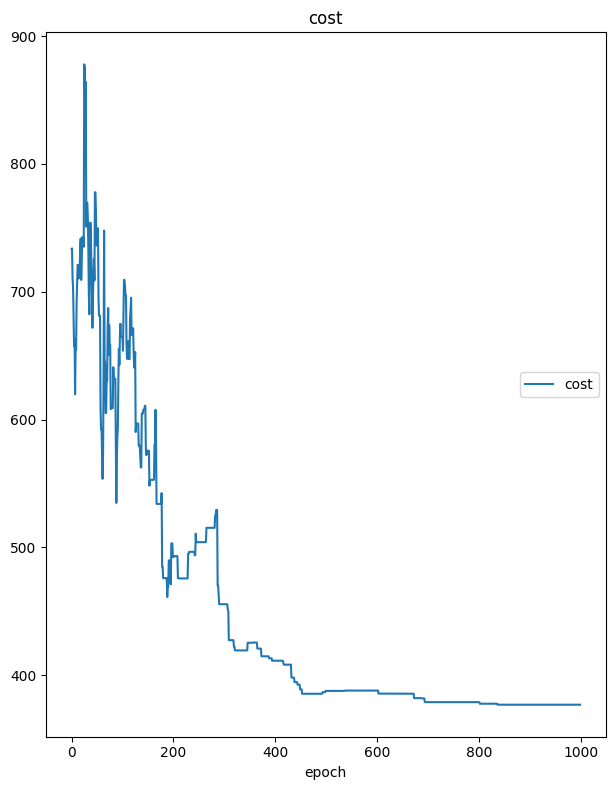

cost
	cost             	 (min:  376.824, max:  877.932, cur:  376.824)


In [21]:
df_best_annealing_normal = annealing_normal(df, n_iter=1000, display=True)

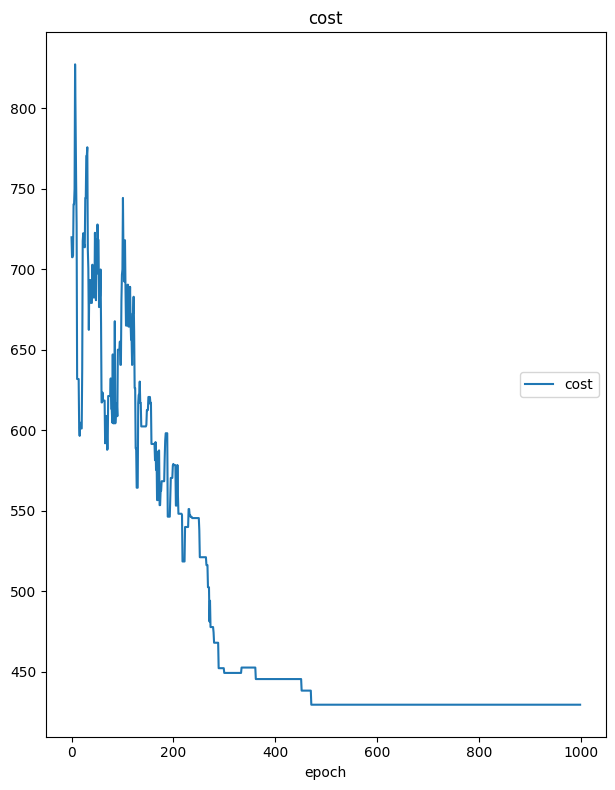

cost
	cost             	 (min:  429.575, max:  827.130, cur:  429.575)


In [22]:
df_best_annealing_max = annealing_max_swap(df, n_iter=1000, display=True)

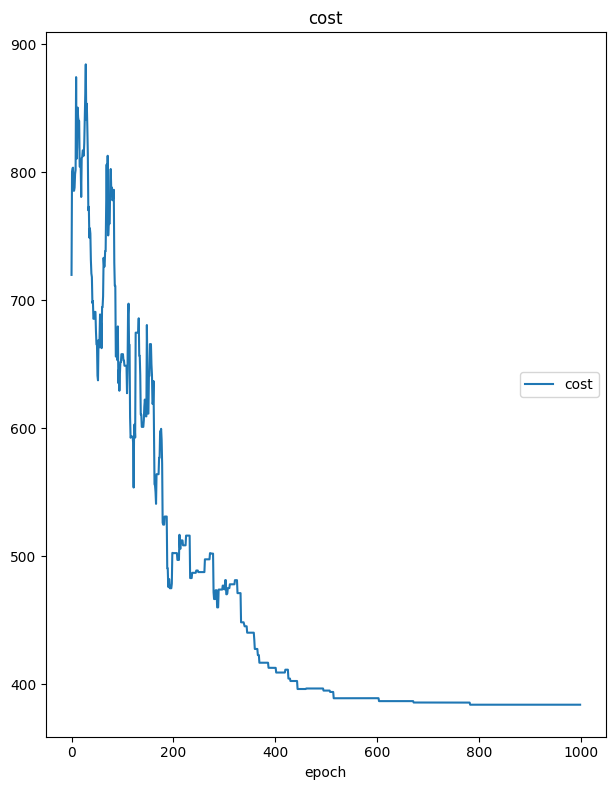

cost
	cost             	 (min:  384.168, max:  884.171, cur:  384.168)


In [23]:
df_best_annealing_normal_insert = annealing_normal_insert(df, n_iter=1000, display=True)